In [7]:
import pandas as pd
import numpy as np
import math
from numpy.linalg import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
## Calling the dataframe
data = pd.read_excel("Recommender_Dataset.xlsx")

In [9]:
# Number of universities (classes)
data['University'].nunique()

35

<AxesSubplot: xlabel='University'>

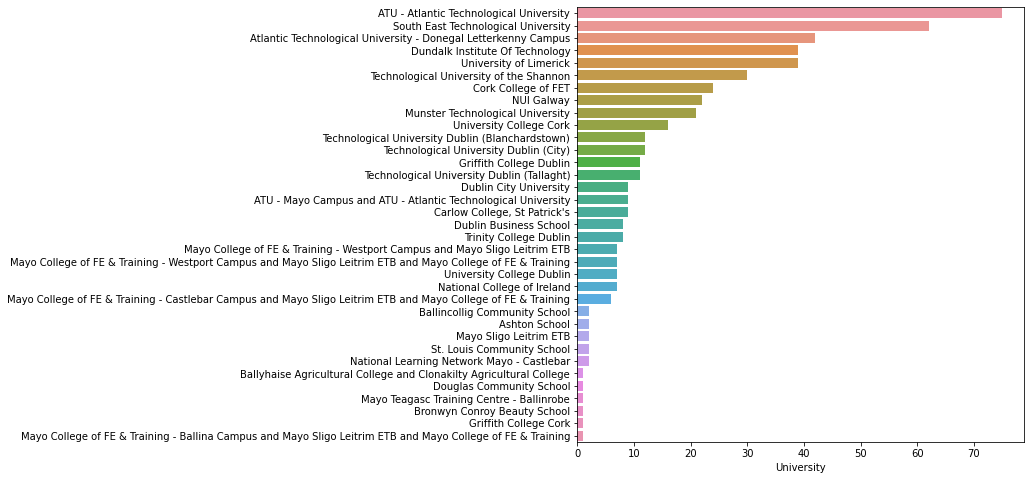

In [10]:
# Number of entries in each class
entries = data['University'].value_counts()
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=entries,y=entries.index, ax=ax)

In [34]:
# Number of City 
data['City'].nunique()

9

<AxesSubplot: xlabel='City'>

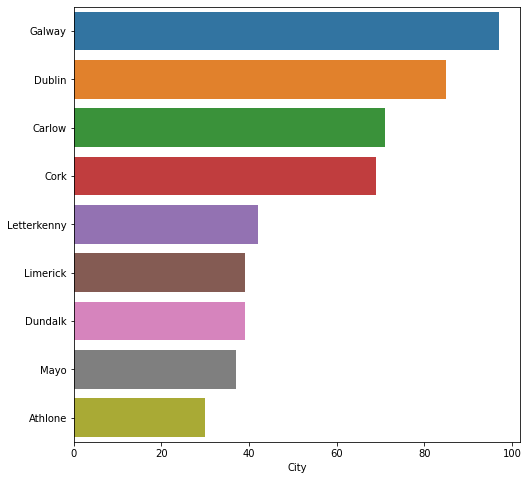

In [35]:
# Number of entries in each class
entries = data['City'].value_counts()
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=entries,y=entries.index, ax=ax)

In [38]:
# Number of Intrest 
data['Interest'].nunique()

6

<AxesSubplot: xlabel='Interest'>

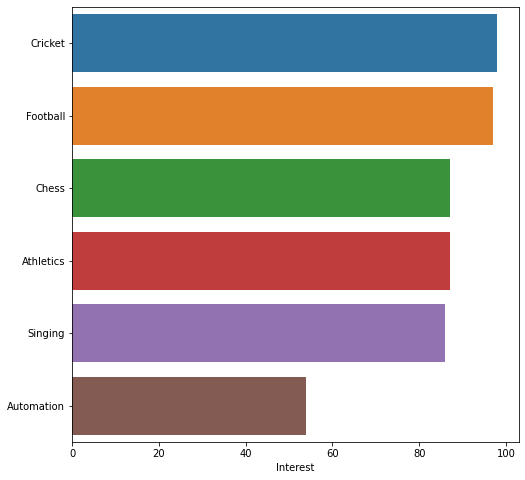

In [39]:
# Number of entries in each class
entries = data['Interest'].value_counts()
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=entries,y=entries.index, ax=ax)

In [40]:
# Number of Intrest 
data['Budget'].nunique()

19

<AxesSubplot: xlabel='Budget'>

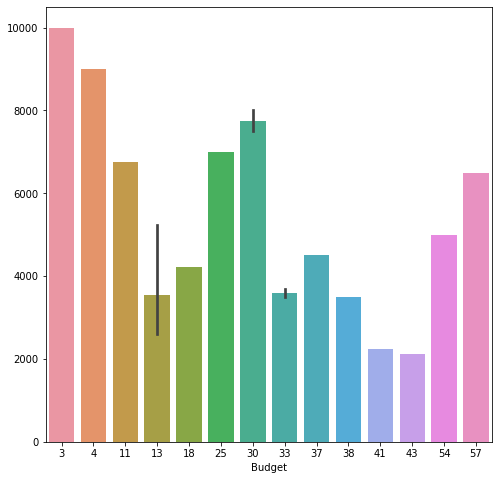

In [41]:
# Number of entries in each class
entries = data['Budget'].value_counts()
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=entries,y=entries.index, ax=ax)

# Visualization of parameters


# Histogram to see the distribution

<AxesSubplot: >

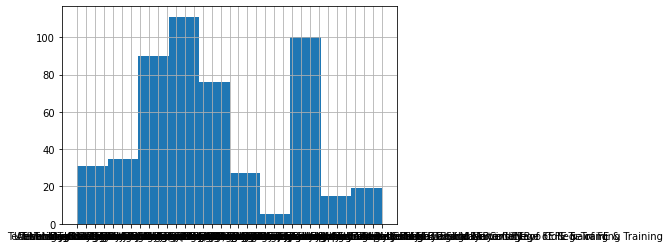

In [21]:
data.University.hist()


<AxesSubplot: >

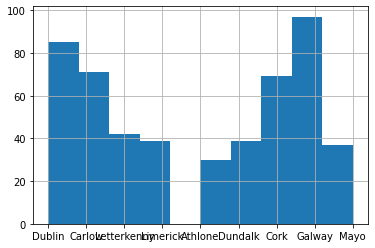

In [29]:
data.City.hist()


<AxesSubplot: >

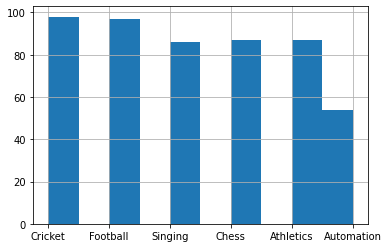

In [30]:
data.Interest.hist()


<AxesSubplot: >

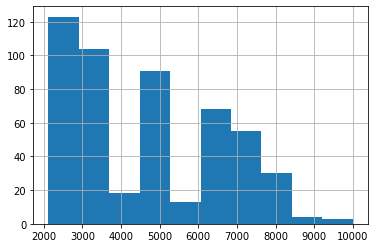

In [32]:
data.Budget.hist()


In [46]:
data.head()

,University,Course Name,CAO opening rank,CAO closing rank,Budget,City,Interest,Job domain
0,University College Dublin,Biomedical Engineering (DN150),556,625,6000,Dublin,Cricket,IT
1,University College Dublin,Chem & Bioprocess Engineering (NQS2),528,625,5000,Dublin,Football,HR
2,University College Dublin,Civil Engineering (DN150),551,625,4500,Dublin,Singing,Management
3,University College Dublin,Computer Science (DN201),542,625,3500,Dublin,Chess,Support
4,University College Dublin,Electrical/Electronics Engineering (DN150),555,625,6500,Dublin,Athletics,Finance


In [4]:
## making the buckets for the Budget
## 1: € 2000- € 4000 2: € 4000 - € 8000 3: € 8000 - € 10000 4: € 10000 - € 20000 Making in the Increasing Order
def budget(num):
  if num>=2000 and num<4000:
    return 1
  elif num>=4000 and num<8000:
    return 2
  elif num>=8000 and num<10000:
    return 3
  else:
    return 4

bud_value = data['Budget'].values
bucket_bud = []
for num in bud_value:
  bucket_bud.append(budget(num))

data['Budget_Bucket'] = bucket_bud


#Case 1: Simple Recommendar Model
Steps:
1. Taking all the data and converting them to Label Encoding
2. Applying the collaborative filtering on the top of it to get the results

In [5]:
cols = list(data.columns.values)
cat_cols = ["University","Course Name","City","Interest","Job domain"]
num_cols = ["CAO opening rank","CAO closing rank"]
data1 = data.copy()

le_c = preprocessing.LabelEncoder()
le_i = preprocessing.LabelEncoder()
le_jd = preprocessing.LabelEncoder()
le_bd = preprocessing.LabelEncoder()

data1['Budget_Bucket'] = data1['Budget_Bucket'].astype('str')
data1["City"] = le_c.fit_transform(data1["City"])
for elem in data1['City'].unique():
    data1['City'+str(elem)] = data1['City'] == elem

data1["Interest"] = le_i.fit_transform(data1["Interest"])
for elem in data1['Interest'].unique():
    data1['Interest'+str(elem)] = data1['Interest'] == elem

data1["Job domain"] = le_jd.fit_transform(data1["Job domain"])
for elem in data1['Job domain'].unique():
    data1['Job domain'+str(elem)] = data1['Job domain'] == elem

#data1["Budget_Bucket"] = data1["Budget_Bucket"])
for elem in data1['Budget_Bucket'].unique():
    data1['budget'+str(elem)] = data1['Budget_Bucket'] == elem

for num in num_cols:
  data1[num] = data1[num].astype('int')

rank_nor = []
maxi = 625.0
mini = 0.0
for num in data1['CAO opening rank'].values:
  rank_nor.append(float((num - mini)/(maxi - mini)))

data1['CAO opening rank'] = rank_nor


In [7]:
data_input = pd.DataFrame()
cao_points = input("Enter the CAO Points: [Note: Max 625 and min 0 is acceptable] - ")
city_name = input("Enter the City Name from the Drop Down: ")
field_interest = input("Enter the filed of interest from the choice: ")
hobbies = input("Enter your hobby: ")
spending_limit = input("Enter the budget: ")

data_sim = data1.copy()

data_input['CAO opening rank'] = [float((int(cao_points)-mini)/(maxi-mini))]
data_input['Budget_Bucket'] = [budget(int(spending_limit))]
data_input['City'] = [city_name]
data_input['Interest'] = [hobbies]
data_input['Job domain'] = [field_interest]

data_input['City'] = le_c.transform(data_input['City'])
for elem in data1['City'].unique():
    data_input['City'+str(elem)] = data_input['City'] == elem
data_input['Interest'] = le_i.transform(data_input['Interest'])
for elem in data1['Interest'].unique():
    data_input['Interest'+str(elem)] = data_input['Interest'] == elem
data_input['Job domain'] = le_jd.transform(data_input['Job domain'])
for elem in data1['Job domain'].unique():
    data_input['Job domain'+str(elem)] = data_input['Job domain'] == elem

data_input['Budget_Bucket'] = data_input['Budget_Bucket'].astype('str')
for elem in data1['Budget_Bucket'].unique():
    data_input['budget'+str(elem)] = data_input['Budget_Bucket'] == elem

for num in ['University',  'Course Name', 'CAO closing rank', 'Budget', 'City', 'Interest', 'Job domain', 'Budget_Bucket']:
  data_sim.pop(num)
  try:
    data_input.pop(num)
  except:
    continue


pairwise_similarities=np.dot(data_sim.values,data_input.T)/(norm(data_sim.values)*norm(data_input.values))

Enter the CAO Points: [Note: Max 625 and min 0 is acceptable] - 500
Enter the City Name from the Drop Down: Dublin
Enter the filed of interest from the choice: IT
Enter your hobby: Cricket
Enter the budget: 5000


In [8]:
data["similarities"] = pairwise_similarities
data_final = data[['University', 'Course Name', 'Budget', 'similarities']]
final_df = data_final.sort_values(by=['similarities'], ascending=False)

In [9]:
print("--------------------------------------------------------------------------------------------------")
print("------------------------------- Recommendation 1 -------------------------------------------------")
print("College Name : ", np.asscalar(final_df.head(1)["University"].values))
print("Course Name  : ", np.asscalar(final_df.head(1)["Course Name"].values))
print("Budget       : ", np.asscalar(final_df.head(1)["Budget"].values))
print("--------------------------------------------------------------------------------------------------")
print("------------------------------- Recommendation 2 -------------------------------------------------")
print("College Name : ", np.asscalar(final_df.head(2).tail(1)["University"].values))
print("Course Name  : ", np.asscalar(final_df.head(2).tail(1)["Course Name"].values))
print("Budget       : ", np.asscalar(final_df.head(2).tail(1)["Budget"].values))
print("--------------------------------------------------------------------------------------------------")
print("------------------------------- Recommendation 3 -------------------------------------------------")
print("College Name : ", np.asscalar(final_df.head(3).tail(1)["University"].values))
print("Course Name  : ", np.asscalar(final_df.head(3).tail(1)["Course Name"].values))
print("Budget       : ", np.asscalar(final_df.head(3).tail(1)["Budget"].values))
print("--------------------------------------------------------------------------------------------------")
print("------------------------------- Recommendation 4 -------------------------------------------------")
print("College Name : ", np.asscalar(final_df.head(4).tail(1)["University"].values))
print("Course Name  : ", np.asscalar(final_df.head(4).tail(1)["Course Name"].values))
print("Budget       : ", np.asscalar(final_df.head(4).tail(1)["Budget"].values))
print("--------------------------------------------------------------------------------------------------")
print("------------------------------- Recommendation 5 -------------------------------------------------")
print("College Name : ", np.asscalar(final_df.head(5).tail(1)["University"].values))
print("Course Name  : ", np.asscalar(final_df.head(5).tail(1)["Course Name"].values))
print("Budget       : ", np.asscalar(final_df.head(5).tail(1)["Budget"].values))
print("--------------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------
------------------------------- Recommendation 1 -------------------------------------------------
College Name :  University College Dublin
Course Name  :  Structural Engineering with Architecture (DN150)
Budget       :  7000
--------------------------------------------------------------------------------------------------
------------------------------- Recommendation 2 -------------------------------------------------
College Name :  University College Dublin
Course Name  :  Biomedical Engineering (DN150)
Budget       :  6000
--------------------------------------------------------------------------------------------------
------------------------------- Recommendation 3 -------------------------------------------------
College Name :  Dublin City University
Course Name  :  Common Entry into Engineering (DC200)
Budget       :  6750
------------------------------------------------------

#Case 2: Sampling Recommendar Model
Steps:
1. Taking all the data and converting them to Label Encoding
2. Getting the sample of the dataset to make a final sample
3. Applying the collaborative filtering on the top of it to get the results

In [10]:
## Calling the dataframe
data = pd.read_excel("Recommender_Dataset.xlsx")

In [11]:
## making the buckets for the Budget
## 1: € 2000- € 4000 2: € 4000 - € 8000 3: € 8000 - € 10000 4: € 10000 - € 20000 Making in the Increasing Order
def budget(num):
  if num>=2000 and num<4000:
    return 1
  elif num>=4000 and num<8000:
    return 2
  elif num>=8000 and num<10000:
    return 3
  else:
    return 4

bud_value = data['Budget'].values
bucket_bud = []
for num in bud_value:
  bucket_bud.append(budget(num))

data['Budget_Bucket'] = bucket_bud

In [12]:
cols = list(data.columns.values)
cat_cols = ["University","Course Name","City","Interest","Job domain"]
num_cols = ["CAO opening rank","CAO closing rank"]
data1 = data.copy()

le_c = preprocessing.LabelEncoder()
le_i = preprocessing.LabelEncoder()
le_jd = preprocessing.LabelEncoder()
le_bd = preprocessing.LabelEncoder()

data1['Budget_Bucket'] = data1['Budget_Bucket'].astype('str')
data1["City"] = le_c.fit_transform(data1["City"])
for elem in data1['City'].unique():
    data1['City'+str(elem)] = data1['City'] == elem

data1["Interest"] = le_i.fit_transform(data1["Interest"])
for elem in data1['Interest'].unique():
    data1['Interest'+str(elem)] = data1['Interest'] == elem

data1["Job domain"] = le_jd.fit_transform(data1["Job domain"])
for elem in data1['Job domain'].unique():
    data1['Job domain'+str(elem)] = data1['Job domain'] == elem

#data1["Budget_Bucket"] = data1["Budget_Bucket"])
for elem in data1['Budget_Bucket'].unique():
    data1['budget'+str(elem)] = data1['Budget_Bucket'] == elem

for num in num_cols:
  data1[num] = data1[num].astype('int')

rank_nor = []
maxi = 625.0
mini = 0.0
for num in data1['CAO opening rank'].values:
  rank_nor.append(float((num - mini)/(maxi - mini)))

data1['CAO opening rank'] = rank_nor

In [13]:
data_input = pd.DataFrame()
cao_points = input("Enter the CAO Points: [Note: Max 625 and min 0 is acceptable] - ")
city_name = input("Enter the City Name from the Drop Down: ")
field_interest = input("Enter the filed of interest from the choice: ")
hobbies = input("Enter your hobby: ")
spending_limit = input("Enter the budget: ")

def best_datasample(data, city_name, field_interest):
  data1 = data[data['City']==city_name]
  if data1.shape[0] == 0:
    data1 = data

  data2 = data1[data1['Job domain']==field_interest]
  if data2.shape[0] == 0:
    data2 = data1
  return data2

data_sim = best_datasample(data1, city_name, field_interest)

data_input['CAO opening rank'] = [float((int(cao_points)-mini)/(maxi-mini))]
data_input['Budget_Bucket'] = [budget(int(spending_limit))]
data_input['City'] = [city_name]
data_input['Interest'] = [hobbies]
data_input['Job domain'] = [field_interest]

data_input['City'] = le_c.transform(data_input['City'])
for elem in data1['City'].unique():
    data_input['City'+str(elem)] = data_input['City'] == elem
data_input['Interest'] = le_i.transform(data_input['Interest'])
for elem in data1['Interest'].unique():
    data_input['Interest'+str(elem)] = data_input['Interest'] == elem
data_input['Job domain'] = le_jd.transform(data_input['Job domain'])
for elem in data1['Job domain'].unique():
    data_input['Job domain'+str(elem)] = data_input['Job domain'] == elem

data_input['Budget_Bucket'] = data_input['Budget_Bucket'].astype('str')
for elem in data1['Budget_Bucket'].unique():
    data_input['budget'+str(elem)] = data_input['Budget_Bucket'] == elem

for num in ['University',  'Course Name', 'CAO closing rank', 'Budget', 'City', 'Interest', 'Job domain', 'Budget_Bucket']:
  data_sim.pop(num)
  try:
    data_input.pop(num)
  except:
    continue


pairwise_similarities=np.dot(data_sim.values,data_input.T)/(norm(data_sim.values)*norm(data_input.values))

Enter the CAO Points: [Note: Max 625 and min 0 is acceptable] - 500
Enter the City Name from the Drop Down: Dublin
Enter the filed of interest from the choice: IT
Enter your hobby: Cricket
Enter the budget: 5000


In [14]:
data["similarities"] = pairwise_similarities
data_final = data[['University', 'Course Name', 'Budget', 'similarities']]
final_df = data_final.sort_values(by=['similarities'], ascending=False)

In [15]:
print("--------------------------------------------------------------------------------------------------")
print("------------------------------- Recommendation 1 -------------------------------------------------")
print("College Name : ", np.asscalar(final_df.head(1)["University"].values))
print("Course Name  : ", np.asscalar(final_df.head(1)["Course Name"].values))
print("Budget       : ", np.asscalar(final_df.head(1)["Budget"].values))
print("--------------------------------------------------------------------------------------------------")
print("------------------------------- Recommendation 2 -------------------------------------------------")
print("College Name : ", np.asscalar(final_df.head(2).tail(1)["University"].values))
print("Course Name  : ", np.asscalar(final_df.head(2).tail(1)["Course Name"].values))
print("Budget       : ", np.asscalar(final_df.head(2).tail(1)["Budget"].values))
print("--------------------------------------------------------------------------------------------------")
print("------------------------------- Recommendation 3 -------------------------------------------------")
print("College Name : ", np.asscalar(final_df.head(3).tail(1)["University"].values))
print("Course Name  : ", np.asscalar(final_df.head(3).tail(1)["Course Name"].values))
print("Budget       : ", np.asscalar(final_df.head(3).tail(1)["Budget"].values))
print("--------------------------------------------------------------------------------------------------")
print("------------------------------- Recommendation 4 -------------------------------------------------")
print("College Name : ", np.asscalar(final_df.head(4).tail(1)["University"].values))
print("Course Name  : ", np.asscalar(final_df.head(4).tail(1)["Course Name"].values))
print("Budget       : ", np.asscalar(final_df.head(4).tail(1)["Budget"].values))
print("--------------------------------------------------------------------------------------------------")
print("------------------------------- Recommendation 5 -------------------------------------------------")
print("College Name : ", np.asscalar(final_df.head(5).tail(1)["University"].values))
print("Course Name  : ", np.asscalar(final_df.head(5).tail(1)["Course Name"].values))
print("Budget       : ", np.asscalar(final_df.head(5).tail(1)["Budget"].values))
print("--------------------------------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------
------------------------------- Recommendation 1 -------------------------------------------------
College Name :  University College Dublin
Course Name  :  Structural Engineering with Architecture (DN150)
Budget       :  7000
--------------------------------------------------------------------------------------------------
------------------------------- Recommendation 2 -------------------------------------------------
College Name :  University College Dublin
Course Name  :  Biomedical Engineering (DN150)
Budget       :  6000
--------------------------------------------------------------------------------------------------
------------------------------- Recommendation 3 -------------------------------------------------
College Name :  Dublin City University
Course Name  :  Common Entry into Engineering (DC200)
Budget       :  6750
------------------------------------------------------